In [367]:
# 1 Logistic Regression: predict whether a student gets admitted into a university
## import packeges
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op
from matplotlib import pyplot
## set work directory
os.chdir('C:\\Users\\gdong\\Desktop\\ML -AN\\Assignments\ex2\\')
os.getcwd()

'C:\\Users\\gdong\\Desktop\\ML -AN\\Assignments\\ex2'

In [368]:
## read data
dat = pd.read_table('./ex2data1.txt', sep = ',', names=('e1_score', 'e2_score','admit'))
dat.head()


,e1_score,e2_score,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


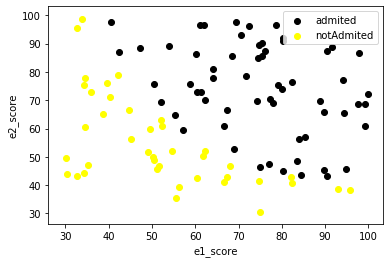

In [369]:
# 1.1 Visualizing the data
def plotData(dat,xlab,ylab):
    x1,y1 = dat[dat.iloc[:,2]==1].iloc[:,0],dat[dat.iloc[:,2]==1].iloc[:,1]
    plt.scatter(x1, y1, color='black',label = xlab)

    x2,y2 = dat[dat.iloc[:,2]==0].iloc[:,0],dat[dat.iloc[:,2]==0].iloc[:,1]
    plt.scatter(x2, y2, color='yellow',label = ylab)

    plt.xlabel('e1_score')
    plt.ylabel('e2_score')

    plt.legend(loc='upper right')

plotData(dat,'admited','notAdmited')

In [370]:
# 1.2 Implementation
## sigmoid function
def Sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
sigmoid(0)

0.5

In [371]:
# 1.2.2 Cost function and gradient
## gradient
def Gradient(theta,X,y):
    m,n = X.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    grad = ((X.T).dot(Sigmoid(X.dot(theta))-y))/m
    return grad  
    #J_theta = 1/m*(np.sum(-y*np.log(sigmoid(np.matmul(np.transpose(theta),X))) 
                          #- (1-y)*np.log(1-sigmoid(np.matmul(np.transpose(theta),X)))))
    #theta = theta - alpha/m*np.transpose(X)*(sigmoid(np.matmul(X*theta))-y)

## Cost
def CostFunc(theta,X,y):
    m,n = X.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    term1 = np.log(Sigmoid(X.dot(theta)))
    term2 = np.log(1-Sigmoid(X.dot(theta)))
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2
    J = -((np.sum(term))/m)
    return J

In [372]:
# 1.2.3 Learning parameters using fminunc
x, y = dat.loc[:,['e1_score','e2_score']],np.array(dat['admit']).reshape(100,1)
X = np.array(pd.concat([pd.DataFrame(np.ones(len(dat))),x], axis=1))
y = np.array(y)
theta_initial = np.zeros(len(dat.columns))

In [373]:
## optimization on theta
Result = op.minimize(fun = CostFunc, 
                                 x0 = theta_initial, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = Gradient)
optimal_theta = Result.x
optimal_theta

array([-25.16131853,   0.20623159,   0.20147149])

In [374]:
# 1.2.4 Evaluating logistic regression
## predictive function
def logReg(X_test):
    return(Sigmoid(optimal_theta.reshape(3,1).T.dot(X_test)))

X_test = np.array([[1],[45],[85]])
logReg(X_test)

array([[0.77629062]])

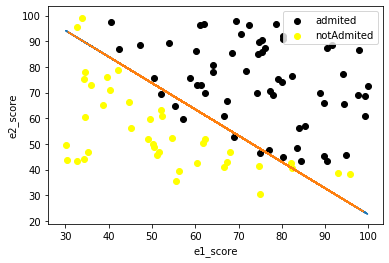

In [375]:
## boundary visualization
plotData(dat,'admited','notAdmited')
plt.plot(x, -0.20623159/0.20147149*x + (np.log(1)/0.20147149)-(-25.16131853/0.20147149))  # when boundary is 0.5

In [376]:
## prediction function
def predict(theta, X):
    p = np.zeros(X.shape[0])
    p[X.dot(theta)>0] = 1
    return p

In [377]:
# calculate training accuracy
accuracy = np.sum(predict(optimal_theta,X).reshape(100,1) == y)/100
print('Accuracy on training data is ' + str(accuracy))

Accuracy on training data is 0.89


In [378]:
# 2 Regularized logistic regression
dat2 = pd.read_table('./ex2data2.txt', sep = ',', names=('test1', 'test2','pass'))
dat2.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0, 0.5, 'test 2')

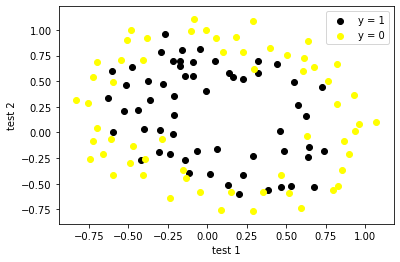

In [379]:
# visualiza dat2
plotData(dat2,'y = 1','y = 0')
plt.xlabel('test 1')
plt.ylabel('test 2')

In [385]:
# 2.2 Feature mapping
## quoted from: https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise2/exercise2.ipynb
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.
    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.
    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.
    degree: int, optional
        The polynomial degree.
    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

In [386]:
# 2.3 Cost function and gradient
## gradient
def Gradient_reg(theta,X,y,lambda_):
    m,n = X.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    grad = ((X.T).dot(Sigmoid(X.dot(theta))-y))/m + lambda_/m*theta
    return grad  

## Cost
def CostFunc_reg(theta,X,y,lambda_):
    m,n = X.shape
    theta = theta.reshape((n,1))
    y = y.reshape((m,1))
    term1 = np.log(Sigmoid(X.dot(theta)))
    term2 = np.log(1-Sigmoid(X.dot(theta)))
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2
    J = -((np.sum(term))/m) + lambda_/(2*m)*np.sum(theta**2)
    return J

In [387]:
# Initialize fitting parameters
theta_initial = np.zeros(X.shape[1])
lambda_ = 1
X = mapFeature(dat2.iloc[:, 0],dat2.iloc[:, 1])
y = np.array(dat2['pass']).reshape(len(dat2),1)
# Compute and display initial cost and gradient for regularized logistic
# regression
cost = CostFunc_reg(initial_theta, X, y, lambda_)
print('initial cost is ' + str(cost))

initial cost is 0.6931471805599454


In [388]:
## optimization on theta with penalty term
Result = op.minimize(fun = CostFunc_reg, 
                                 x0 = theta_initial, 
                                 args = (X, y,lambda_),
                                 method = 'TNC',
                                 jac = Gradient_reg)
optimal_theta_reg = Result.x
optimal_theta_reg

array([ 1.14201564,  0.60123715,  1.1671581 , -1.87180903, -0.91567126,
       -1.26944013,  0.12678674, -0.36850105, -0.3449425 , -0.17391076,
       -1.4237067 , -0.04838577, -0.60631732, -0.26916587, -1.16320192,
       -0.24269703, -0.20697485, -0.04305267, -0.28008545, -0.28708931,
       -0.46912456, -1.03629766,  0.02904379, -0.29250729,  0.01716376,
       -0.32880515, -0.13795624, -0.93187564])